# Publications Overview

A notebook that provides a quick overview of the publications within the dataset.

## Notebook setup

Ensure that necessary libraries are install and imported into the workplace.

In [1]:
# setup relative path to import local module (needed when used in Conda) https://stackoverflow.com/questions/34478398
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import visualising_poetry.data as vpd
import visualising_poetry.widgets as vpw

# import libraries
import matplotlib.pyplot as plot
import seaborn as sn
import ipywidgets as widgets
from IPython.display import display

# get data and process (if necessary)
vpd.setup_if_needed()

# get data as a single data frame
df = vpd.complete_dataset()

## Publication coverage by year

A heat map / matrix to show the coverage of the dataset for each publication.

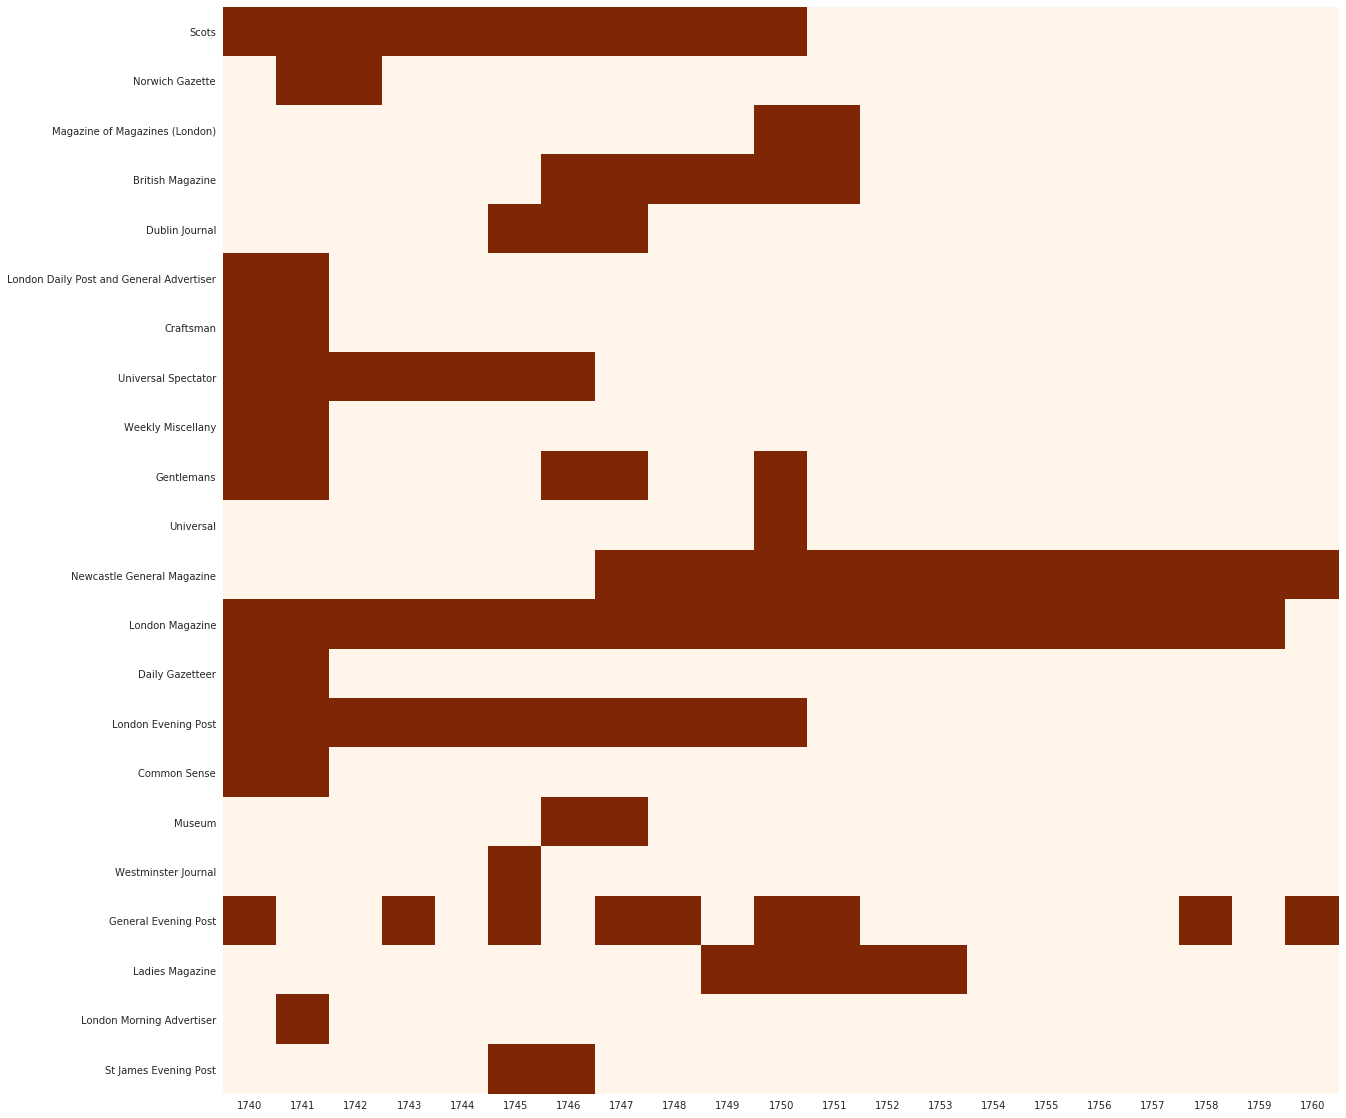

In [2]:
# create the matrix
matrix = vpd.create_publication_year_matrix(df)

# display the heat map
plot.figure(figsize=(20, 20))
with sn.axes_style("white"):
    sn.heatmap(matrix, cmap='Oranges', annot=False, cbar=False, fmt='g', annot_kws={'size':14})
plot.show()

## Titles (showing original vs copies)

Generate a report showing the total number of publications vs copies by year. Generate a data table and plot.

In [3]:
# create the drop-down widget and button
pub_widget = vpw.publication_list_widget(df)
btn = widgets.Button(description='Generate report')

# output for our widget
out = widgets.Output(layout={'border': '1px solid black'})

# method called to generate output
def on_button_pressed(button):
    out.clear_output()
    vpw.publication_overview_selection(df, pub_widget.value, out)

# display UI
btn.on_click(on_button_pressed)
display(pub_widget)
display(btn)
out


Select(description='Choose', options=('British Magazine', 'Common Sense', 'Craftsman', 'Daily Gazetteer', 'Dub…

Button(description='Generate report', style=ButtonStyle())

Output(layout=Layout(border='1px solid black'))